In [1]:
#Função para ler os dados do IBGE sobre a Inflação Mensal
ler_ibge_ipca_subitem <- function(data, plot = NULL, top_n = NULL){
  pacotes <- c("readxl", "dplyr", "tibble", "ggplot2", "ggthemes")
  instalados <- installed.packages()
  faltam <- pacotes[!(pacotes %in% instalados[,1])]
  if(length(faltam) > 0){
    install.packages(faltam)
    for(i in 1:length(faltam)){
      message(paste(faltam[i], "instalado"))
    }
  } else {
    if(length(faltam) == 0){
      for(i in pacotes){
        library(i, character.only = T)
      }
    }
  }
  stopifnot(is(data, "Date"), length(data) == 1)
  if(data >= format(Sys.Date(), "%Y-01-01")){
    url <- format(
      data,
      "ftp://ftp.ibge.gov.br/Precos_Indices_de_Precos_ao_Consumidor/IPCA/Resultados_por_Subitem/ipca_%Y%mSubitem.zip")
  } else{
    url <- format(
      data,
      "ftp://ftp.ibge.gov.br/Precos_Indices_de_Precos_ao_Consumidor/IPCA/Resultados_por_Subitem/%Y/ipca_%Y%mSubitem.zip"
    )
  }
  filename <- format(data, paste0(getwd(), "/ipca_%Y%mSubitem.zip"))
  file <- download.file(url = url, destfile = filename, mode = "wb")
  files <- unzip(zipfile = filename, exdir = getwd())
  dados <- read_excel(path = files, sheet = 1, skip = 4, col_names = T)
  dados <- data.frame(dados)
  dados <- dados[-1,]
  file.remove(files)
  for(i in 2:ncol(dados)){
    dados[,i] <- suppressWarnings(as.numeric(dados[,i]))
  }
  if(is.null(plot)|isFALSE(plot)){
    return(View(dados))
  }else{
    if(isTRUE(plot)&is.null(top_n)){
      dados %>%
        ungroup() %>%
        top_n(10, NACIONAL) %>%
        mutate(`...1` = reorder(`...1`, NACIONAL)) %>%
        ggplot()+
        geom_col(aes(x = `...1`, y = NACIONAL))+
        coord_flip()+
        labs(x = "", y = "%", title = "Produtos que mais subiram",
             subtitle = format(data, "%B de %Y"), caption = "Fonte:IBGE")+
        theme_economist()
    } else{
      if(isTRUE(plot)&!is.null(top_n)){
        return(dados %>%
                 ungroup() %>%
                 top_n(top_n, NACIONAL) %>%
                 mutate(`...1` = reorder(`...1`, NACIONAL)) %>%
                 ggplot()+
                 geom_col(aes(x = `...1`, y = NACIONAL))+
                 coord_flip()+
                 labs(x = "", y = "%", title = if(top_n > 0){
                   print("Produtos que mais subiram")
                 } else{
                   print("Produtos que mais caíram")
                 },
                 subtitle = format(data, "%B de %Y"), caption = "Fonte:IBGE")+
                 theme_economist())
      }
    }
  }
}

New names:
* `` -> ...1



[1] "Produtos que mais caíram"


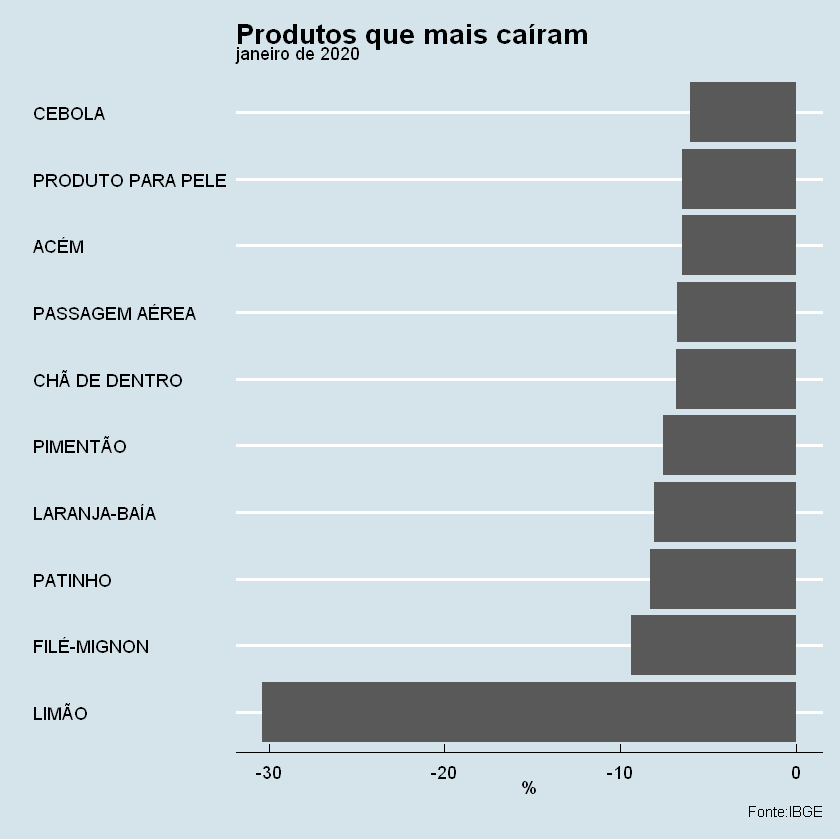

In [5]:
ler_ibge_ipca_subitem(as.Date("2020-01-01"), plot = T, top_n = -10)